# ANN Classification Ruben Serdons (Loan Approval)

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import regularizers

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('./Data/Loan.csv')

In [4]:
df.head(20)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,...,14859.166667,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
7,2018-01-08,49,97345,516,Employed,High School,23,19634,12,Divorced,...,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4
8,2018-01-09,34,116841,603,Employed,Bachelor,12,55353,60,Divorced,...,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0,61.0
9,2018-01-10,46,40615,612,Employed,Associate,19,25443,12,Married,...,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0,53.0


In [5]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

We see that there are no duplicate rows. So that is a good thing.

In [7]:
df.dtypes

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

We're going to check for the columns who's type is **object** how many unique values it has, and what the unique values are

In [8]:
for column in df.columns:
    if str(df[column].dtype) == 'object':
        print('-------------------------')
        print(df[column].value_counts())
        print("Total different values: ", str(len(df[column].unique())))

-------------------------
ApplicationDate
2018-01-01    1
2054-07-01    1
2054-07-08    1
2054-07-07    1
2054-07-06    1
             ..
2036-04-02    1
2036-04-01    1
2036-03-31    1
2036-03-30    1
2072-10-03    1
Name: count, Length: 20000, dtype: int64
Total different values:  20000
-------------------------
EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64
Total different values:  3
-------------------------
EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64
Total different values:  5
-------------------------
MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64
Total different values:  4
-------------------------
HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64
Total different values:  4
-------------------

In [9]:
# We drop the date column since it is not telling us much
df.drop('ApplicationDate', axis=1, inplace=True)

In [10]:
# let us check for NA values
df.isna().sum()

Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

There are no null values.

## Encoding

We have EmploymentStatus, EducationLevel, MaritalStatus, HomeOwnershipStatus and LoanPurposes that need to be encoded.

In [11]:
from sklearn.preprocessing import LabelEncoder

variables = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus',
            'LoanPurpose']

encoder = LabelEncoder()

df[variables] = df[variables].apply(encoder.fit_transform)


In [12]:
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,0,4,22,13152,48,1,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,0,0,15,26045,48,2,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,0,1,26,17627,36,1,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,0,3,34,37898,96,2,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,0,0,17,9184,36,1,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [13]:
# Let us have a look at the importance of the features in function of the target varianble 
# We will use the correlation matrix to see the importance of the features in function of the target variable

corr_matrix = df.corr()['LoanApproved']

corr_matrix = corr_matrix.sort_values(ascending=False)

for i in range(len(corr_matrix)):
    print(corr_matrix.index[i], corr_matrix[i])

LoanApproved 1.0
MonthlyIncome 0.6041006582209991
AnnualIncome 0.5979001985185184
NetWorth 0.1878921177601798
TotalAssets 0.18401061872767488
CreditScore 0.1420003687024605
Age 0.14102854508347634
Experience 0.14075515432839614
LengthOfCreditHistory 0.10594943078868023
PaymentHistory 0.030804360146268087
EducationLevel 0.01964980721970675
JobTenure 0.004996948443239349
UtilityBillsPaymentHistory 0.0033027936380023225
NumberOfDependents 0.0017173109242089694
SavingsAccountBalance 0.0009611969385511927
CheckingAccountBalance 0.0006598805443777165
DebtToIncomeRatio 3.4262317384544114e-05
NumberOfOpenCreditLines -0.004768526667523048
NumberOfCreditInquiries -0.0058849649345531
MaritalStatus -0.006827815774702168
LoanPurpose -0.007061637182375619
CreditCardUtilizationRate -0.010465978638292009
HomeOwnershipStatus -0.018135091560944564
EmploymentStatus -0.02041132770407081
TotalLiabilities -0.029434142483023156
PreviousLoanDefaults -0.06534292185796059
MonthlyDebtPayments -0.0704147422198136

C:\Users\ruben\AppData\Local\Temp\ipykernel_29100\3524278807.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(corr_matrix.index[i], corr_matrix[i])


In [14]:
# Following features are the least important according to the correlation matrix
# We will drop these features

removables = [
    "CheckingAccountBalance",
    "SavingsAccountBalance",
    "DebtToIncomeRatio",
    "NumberOfOpenCreditLines",
    "NumberOfCreditInquiries",
    "MaritalStatus",
    "LoanPurpose",
    "CreditCardUtilizationRate",
    "HomeOwnershipStatus",
    "EmploymentStatus",
    "TotalLiabilities"
]
df.drop(removables, axis=1, inplace=True)

In [15]:
df.head()

,Age,AnnualIncome,CreditScore,EducationLevel,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,BankruptcyHistory,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,4,22,13152,48,2,183,0,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,0,15,26045,48,1,496,0,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,1,26,17627,36,2,902,0,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,3,34,37898,96,1,755,0,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,0,17,9184,36,1,274,0,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


## X and y-variables

In [16]:
drop_columns = [
    'JobTenure', 
    'NumberOfDependents', 
    'UtilityBillsPaymentHistory', 
    'BaseInterestRate', 
    'InterestRate', 
    'EducationLevel', 
    'PaymentHistory', 
    'PreviousLoanDefaults', 
    'BankruptcyHistory', 
    'TotalDebtToIncomeRatio'
]

df.drop(drop_columns, axis=1, inplace=True)

df.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,MonthlyDebtPayments,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,MonthlyLoanPayment,LoanApproved,RiskScore
0,45,39948,617,22,13152,48,183,9,146111,3329.000000,126928,419.805992,0,49.0
1,38,39709,628,15,26045,48,496,9,53204,3309.083333,43609,794.054238,0,52.0
2,47,40724,570,26,17627,36,902,22,25176,3393.666667,5205,666.406688,0,52.0
3,58,69084,545,34,37898,96,755,10,104822,5757.000000,99452,1047.506980,0,54.0
4,37,103264,594,17,9184,36,274,27,244305,8605.333333,227019,330.179140,1,36.0


In [17]:
X = df.drop('LoanApproved', axis=1)

y_temp = df['LoanApproved']

y = tf.keras.utils.to_categorical(y_temp)

<Axes: xlabel='LoanApproved', ylabel='count'>

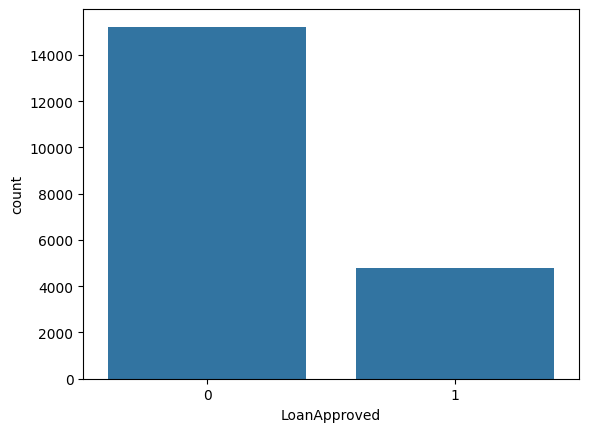

In [18]:
# Our target variable is a binary variable
# Let us have a look at the distribution of the target variable (balance in binary case)

sns.countplot(x='LoanApproved', data=df)

## train/val/test - split

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

best_features = chi_2_features.fit(X_cat, y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
1,AnnualIncome,196757802.93
10,NetWorth,135798925.01
8,TotalAssets,101909621.57
9,MonthlyIncome,16217331.65
4,LoanAmount,8311661.94
11,MonthlyLoanPayment,339174.81
12,RiskScore,14840.55
6,MonthlyDebtPayments,12625.75
3,Experience,2895.91
5,LoanDuration,2012.39


In [21]:
# drop_columns = [
#     'JobTenure', 
#     'NumberOfDependents', 
#     'UtilityBillsPaymentHistory', 
#     'BaseInterestRate', 
#     'InterestRate', 
#     'EducationLevel', 
#     'PaymentHistory', 
#     'PreviousLoanDefaults', 
#     'BankruptcyHistory', 
#     'TotalDebtToIncomeRatio'
# ]

# df.drop(drop_columns, axis=1, inplace=True)

# df.head()

## Create neural network

In [22]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(len(X.columns),),
                     kernel_regularizer=regularizers.l2(0.04)),  # L2 regularisatie toegevoegd
        layers.Dense(8, activation="relu", 
                     kernel_regularizer=regularizers.l2(0.04)),  # L2 regularisatie toegevoegd
        layers.Dense(32, activation="relu", 
                     kernel_regularizer=regularizers.l2(0.04)),  # L2 regularisatie toegevoegd
        layers.Dense(64, activation="relu", 
                     kernel_regularizer=regularizers.l2(0.04)),  # L2 regularisatie
        layers.Dense(16, activation="relu", 
                     kernel_regularizer=regularizers.l2(0.04)),  # L2 regularisatie
        layers.Dense(len(df['LoanApproved'].unique()), activation="softmax")
    ]
)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,834 (14.98 KB)

 Trainable params: 3,834 (14.98 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7042 - loss: 114.8983 - val_accuracy: 0.7637 - val_loss: 15.3078
Epoch 2/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8093 - loss: 14.6427 - val_accuracy: 0.8011 - val_loss: 8.1465
Epoch 3/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 8.9831 - val_accuracy: 0.8363 - val_loss: 4.5679
Epoch 4/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8099 - loss: 5.3078 - val_accuracy: 0.8023 - val_loss: 3.2817
Epoch 5/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.8062 - loss: 2.9334 - val_accuracy: 0.7600 - val_loss: 3.5439
Epoch 6/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8098 - loss: 2.6515 - val_accuracy: 0.8394 - val_loss: 2.4774
Epoch 7/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.8423 - loss: 2.4855 - val_accuracy: 0.8417 - val_loss: 2.4659
Epoch 8/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.8527 - loss: 2.395

<Axes: >

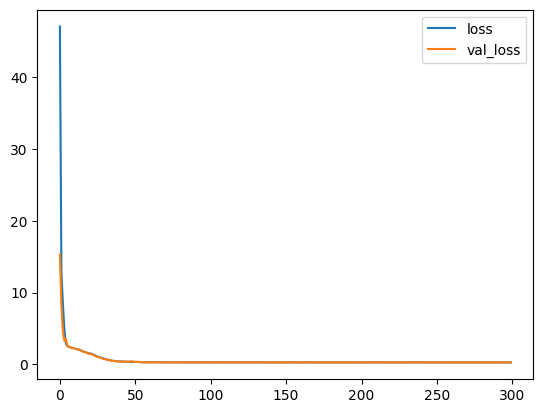

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

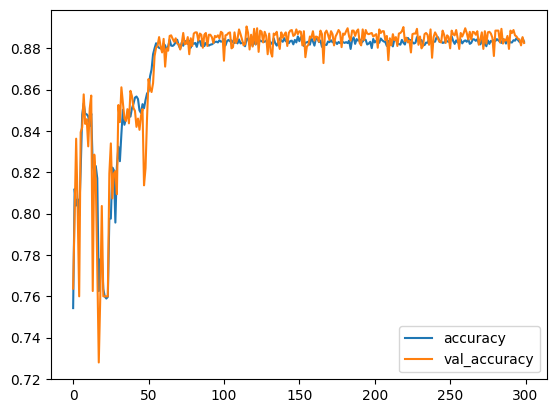

In [25]:
loss_df[['accuracy', 'val_accuracy']].plot()


In [26]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.259805291891098, 0.8805714249610901]

Train data evaluation:
[0.27152881026268005, 0.8788461685180664]


In [27]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


<Axes: >

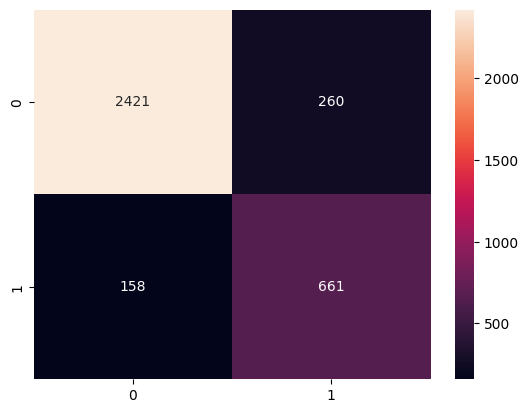

In [28]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

In [29]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2681
           1       0.72      0.81      0.76       819

    accuracy                           0.88      3500
   macro avg       0.83      0.86      0.84      3500
weighted avg       0.89      0.88      0.88      3500


Model overall accuracy: 88.06%


In [30]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary classification, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multi category classification , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


0.9442243229014894

In [31]:
df['CreditScore'].min()
df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'MonthlyDebtPayments', 'LengthOfCreditHistory',
       'TotalAssets', 'MonthlyIncome', 'NetWorth', 'MonthlyLoanPayment',
       'LoanApproved', 'RiskScore'],
      dtype='object')

In [32]:
# We are going to test the model with the following fictional data (created by ChatGPT to mock a profile that will likely be approved for a loan):

tester_row = {
    'Age': 35,                        # Mid-career individual
    'AnnualIncome': 120000,            # High enough annual income for loan approval
    'CreditScore': 780,                # Excellent credit score
    'Experience': 10,                  # 10 years of work experience
    'LoanAmount': 25000,               # Moderate loan amount
    'LoanDuration': 48,                # 48-month loan (4 years)
    'MonthlyDebtPayments': 400,        # Moderate monthly debt payments
    'LengthOfCreditHistory': 15,       # 15 years of credit history
    'TotalAssets': 500000,             # Significant total assets
    'MonthlyIncome': 10000,            # High monthly income
    'NetWorth': 450000,                # High net worth
    'MonthlyLoanPayment': 600,         # Manageable monthly loan payment
    'RiskScore': 0.1                   # Low risk score, indicating strong financial health
}

tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
print(f"the result is {result}")
print(f"There is a {result[1] * 100:.2f}% chance of loan approval for the above profile.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
the result is [0.0219301 0.9780699]
There is a 97.81% chance of loan approval for the above profile.


In [33]:
# Fictional data representing a profile likely to be denied loan approval (Also generated by ChatGPT):

tester_row_low_approval = {
    'Age': 22,                         # Young individual, less financial stability
    'AnnualIncome': 25000,             # Low annual income, insufficient for loan approval
    'CreditScore': 580,                # Poor credit score, indicating higher risk
    'Experience': 1,                   # Minimal work experience
    'LoanAmount': 50000,               # Higher loan amount relative to income
    'LoanDuration': 60,                 # 60-month loan (5 years), longer duration increases risk
    'MonthlyDebtPayments': 800,        # High monthly debt payments, stretching finances
    'LengthOfCreditHistory': 1,        # Very short credit history
    'TotalAssets': 5000,               # Minimal assets, low net worth
    'MonthlyIncome': 2083,             # Low monthly income, struggling to make ends meet
    'NetWorth': -5000,                 # Negative net worth, indicating financial distress
    'MonthlyLoanPayment': 1000,        # Unmanageable monthly loan payment
    'RiskScore': 0.8                   # High risk score, indicating poor financial health
}

tester_row_low_approval = pd.DataFrame([tester_row_low_approval])
result_low_approval = model.predict(tester_row_low_approval)[0]
print(f"the result is {result_low_approval}")
print(f"There is a {result_low_approval[1] * 100:.2f}% chance of loan approval for the above profile.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
the result is [0.9972811  0.00271885]
There is a 0.27% chance of loan approval for the above profile.
